# Training an Autoencoder 

As discussed in the lecture, one of the standard self-supervised learning techniques is "auto-encoding", that is 
taking a datum $x$ to a "code" $c = g_\phi(x)$ and reconstructing it again $x' = f_\theta(c)$

The training goal is to make the reconstruction as close as possible to the original: $L(x,x')$

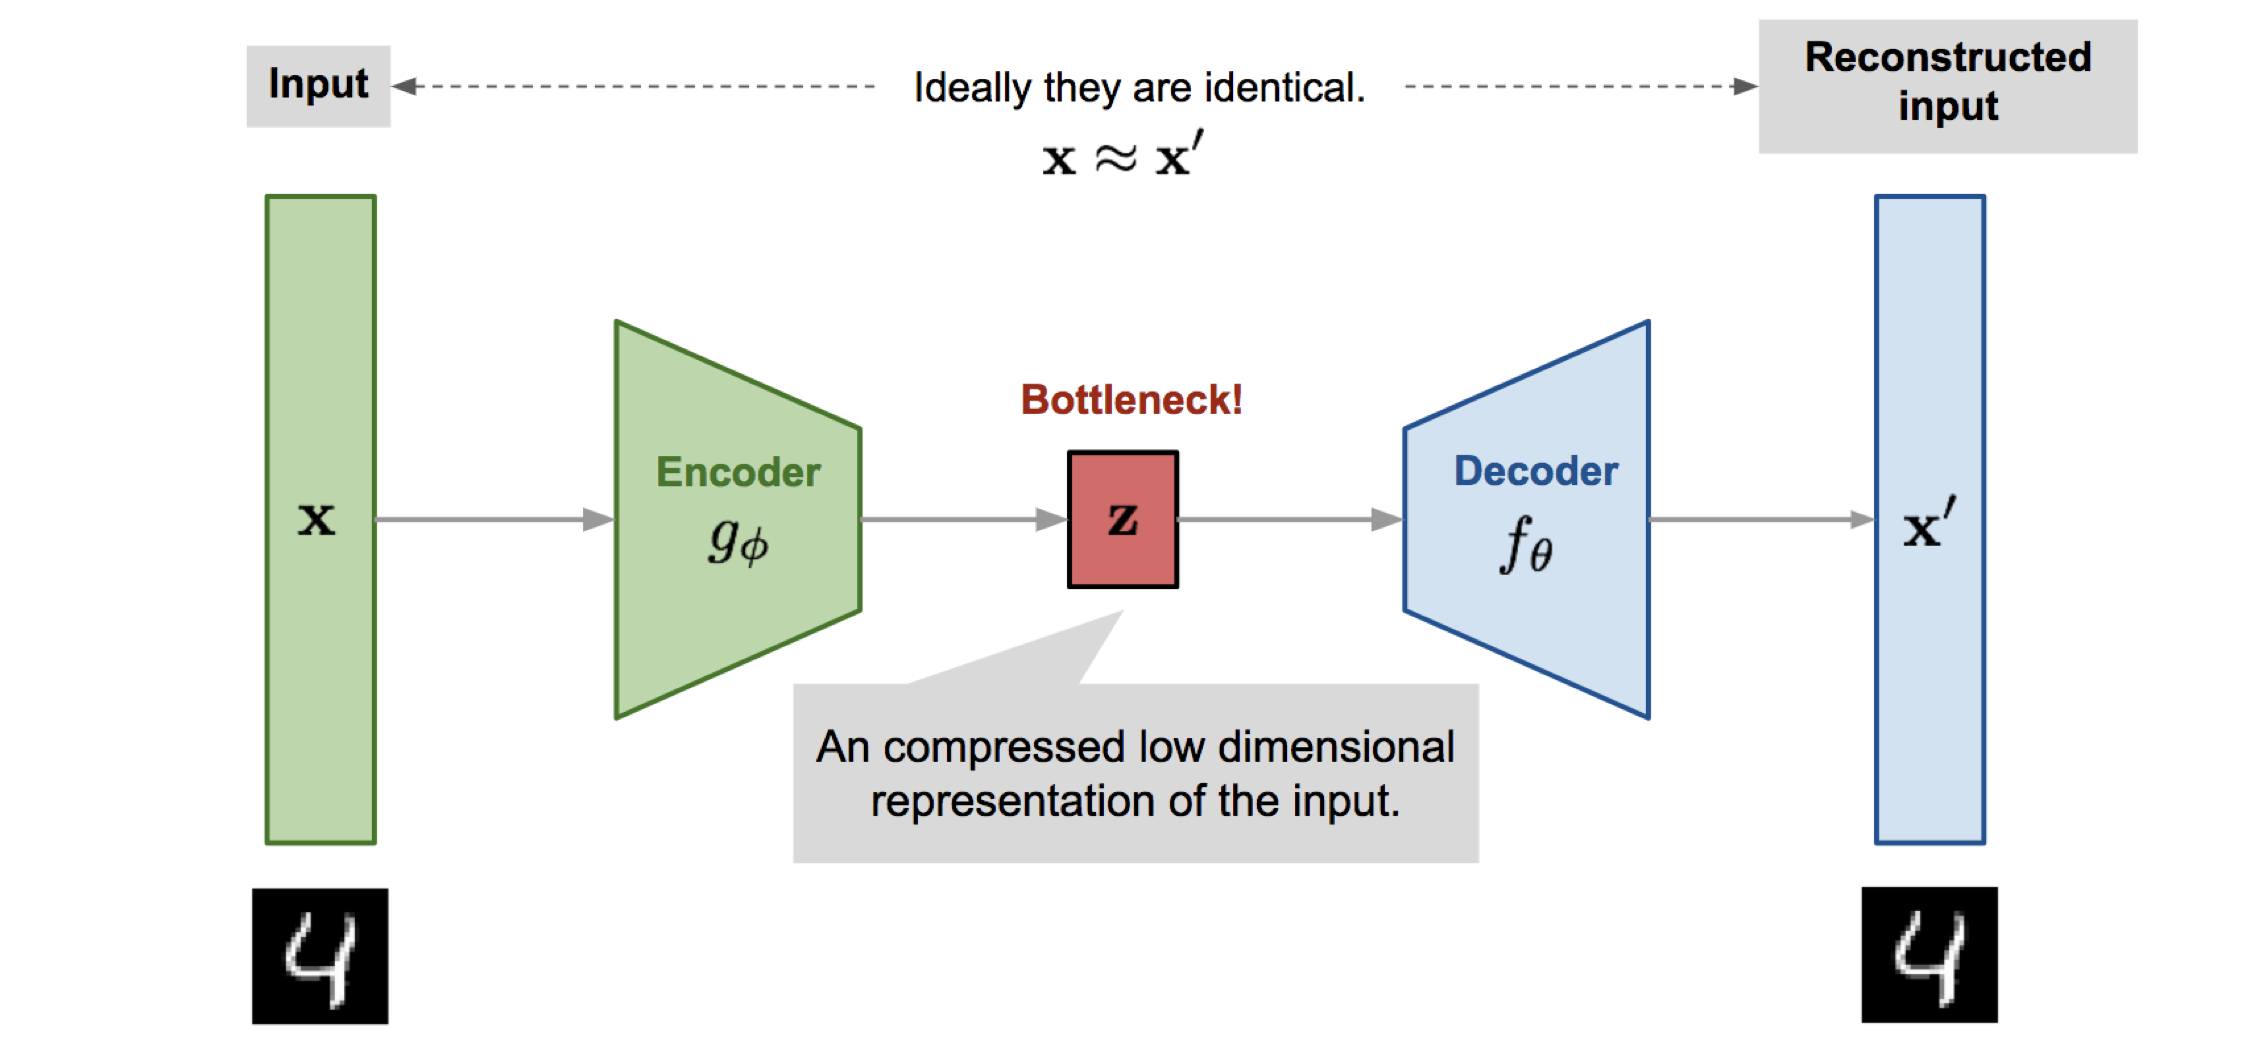

## Step 0: Some imports

In [1]:
import mnist
import numpy as np

import torch
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

## Step 1: Building an Autoencoder with PyTorch

In this step, you will develop an Autoencoder module capable of encoding and decoding images from the MNIST dataset.

### Autoencoder Module

As discussed in the lecture, the Autoencoder consists of two main components: an encoder and a decoder:

#### Task 1: Implement the Encoder

Your first task is to implement the encoder module which transforms the input image into a lower-dimensional encoded representation:

1. **Flattening**: The input image `(bs, 28, 28)` should first be flattened into a one-dimensional tensor of size `(bs, 784)` to be processed by the subsequent MLPs.
2. **Linear Layers**: Implement three MLP layers as follows:
   - The first linear layer should reduce the dimension from 784 to 128, followed by a `ReLU` activation function.
   - Add a second identical transformation (128 to 128) with ReLU activation to ensure depth in feature extraction.
   - The final linear layer must compress the features into a 2-dimensional latent space `(bs, 2)`.

#### Task 2: Implement the Decoder

Your second task is to implement the decoder module which aims to reconstruct the image from the encoded 2-dimensional representation.

1. **Linear Layers**: Implement three linear MLP to increase the dimensions:
   - The first linear layer should expand the dimension from 2 to 128 and apply a `ReLU` activation.
   - Add a second identical expansion (128 to 128) with ReLU activation to help in recovering the features.
   - The final linear layer should transform the features back to the original flattened image size of 784.
2. **Reshaping**: Ensure the output is reshaped back into the original image dimensions `(bs, 28, 28)` for image reconstruction.

### Task 3: Forward Pass Implementation

Implement the `forward()` method:
1. **Encoding**: Pass the input images through the encoder module to obtain the encoded latent representations.
2. **Decoding**: Feed these encoded representations into the decoder to reconstruct the images.
3. **Output**: The method should return a tuple containing the encoded latent and the reconstructed images.

## Hint:
Use the random data trick to track your dims:
```python
x = torch.randn(bs, 28, 28)
```

In [15]:
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # TODO: Define the encoder
        self.encoder = ...

        # TODO: Define the decoder
        self.decoder = ...
    def forward(self,x):
        # TODO: Fill the gap
        latent_code = self.encoder(...)
        
        # TODO: Fill the gap
        reco = self.decoder(...)

        return code,reco

## Step 2: Import Data 

Use `pip install mnist` to get access to the MNIST dataset and write a data-generating function
`sample_train(N, return_labels = False)` that samples N instances from the training set. 
optionally it should also return the labels (this is just for later, since we are doing unsupervised learning, we don't need the labels for training)

### Mind the TODO gap

### Reminder fact:
If we use the labels in the training to have more control over our sampling process as we discussed in the lecture for VAEs and GANs, we get from unsupervised learning to semi-supervised leartning.

In [ ]:
# Load training data
TRAIN = mnist.train_images() 
# TODO: Normalize the training images to range [0, 1]
TRAIN = ...
TRAIN_labels = mnist.train_labels()

# Function to sample N random training examples
def sample_train(N, return_labels=False):
    # Randomly select N indices from training set
    idxs = np.random.choice(np.arange(len(TRAIN)), size=N) 
    images = TRAIN[idxs]
    labels = TRAIN_labels[idxs] 
    
    if return_labels:
        return torch.FloatTensor(images), torch.FloatTensor(labels)  # Convert arrays to FloatTensors and return
    return torch.FloatTensor(images)


## Step 3: The Training Loop

Write a training loop with your Autoencoder model that trains using mini-batches of size 200 and using a standard mean-squared-error (MSE) loss. Train for 50k steps with learning rate 1e-3 (with Adam)

**Optionally**: it's nice to track how the autoencoder is doing as you train.

Write a plotting function `plot(model,samples)` that takes a mini batch of size 1 and plots both the original as well as the reconstructed images side by side

0 0.11956946551799774


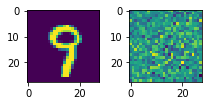

1000 0.043542586266994476
2000 0.04122551903128624
3000 0.041704658418893814
4000 0.040144603699445724
5000 0.03695565089583397
6000 0.03702661767601967
7000 0.03810657560825348
8000 0.0368831492960453
9000 0.03633200004696846
10000 0.0372905358672142


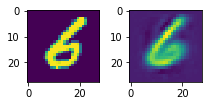

KeyboardInterrupt: 

In [17]:
def plot(model,sample):
    f,axarr = plt.subplots(1,2)
    #TODO: fill the gap
    with torch.no_grad():
        ....
    axarr[0].imshow(sample[0])
    axarr[1].imshow(reco[0])
    f.set_tight_layout(True)


def train():
    #TODO: Define the model 
    model = ...
    #TODO: Define your optimizer
    opt = ...
    for i in range(50000):
        x = sample_train(200)
        code, reco = model(x)
         #TODO: Define and apply the loss function
        loss = ...

        loss.backward()
        opt.step()
        opt.zero_grad()
        
        if i % 1000 == 0:
            print(i,float(loss))
        if i % 10000 == 0:
            plot(model,sample_train(1))
            plt.gcf().set_size_inches(3,3)
            plt.show()
    return model
m = train()

## Step 4: Exploring the Latent Space

Sample a mini batch of size 10,000 **with** labels and encode it into the latent space with the
trained encoder. Since it's a 2-D latent space we can easily visualize it. Plot the distribution
of codes as a scatter plot in the $(c_1,c_2)$-plane and color the markers according to the true label

Observe how the individual clusters correspond among other things to the label

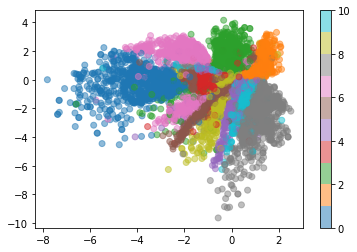

In [5]:
def plot_latent_space(model):
    #TODO: sample a mini-batch of 10,000 samples 
    x,y = ...
    #TODO: sample a mini-batch of 10,000 samples with the model (Don't forget to sample without gradients)
    with #no gradients
        ...
    
    plt.scatter(codes[:,0],codes[:,1],c = y,cmap = 'tab10', alpha = 0.5, vmin = 0, vmax = 10)
    plt.colorbar()
    
plot_latent_space(m)

## Step 5: Generating new images

Given the distribution in the latent space you should have a good feel, which type of code, 
corresponds to which digit.

* Play with the latent code and try to take a code that you think would generate a 4

As you see, the distribution in the latetn space is a bit unruly, if you would

* Generate a digit based on a random R^2 value

you would have a hard time recognizing it as a digit. Try it!

### Important takeaway:

To fix this, we discussed in the lecture the idea of a "Variational Autoencoder" that tries
to control the latent distribution


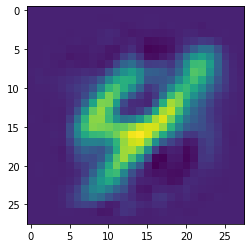

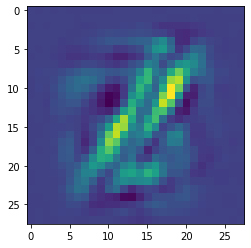

In [6]:
#TODO: Propose a latent code as a torch tensor, to generate "4"
my_lat = ...
plt.imshow(m.decoder(my_lat).detach()[0])
plt.show()